<a href="https://colab.research.google.com/github/Joelss23/Joelss23/blob/main/Actividad_2_Paradigma_BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar Librerias

In [40]:
#Librerias necesarias para acceder a drive
import os
from google.colab import drive

#Montar drive
if not os.path.ismount('/content/drive'):
    drive.mount('/content/drive')

#Ruta a la carpeta de drive
path = "/content/drive/My Drive/Paradigma BD"
os.chdir(path)

#Verificar el cambio el directorio
print("Directorio actual:", os.getcwd())

#Listar archivos
!ls -lh

Directorio actual: /content/drive/My Drive/Paradigma BD
total 213K
-rw------- 1 root root  22K Feb 13 21:27 bank-sem-aplicacion.csv
-rw------- 1 root root 191K Feb 13 21:27 bank-sem-entrenamiento.csv


In [41]:
# Librerias necesarias para Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

##Cargar Datos

In [42]:
#Cargar datos
train_data = pd.read_csv("bank-sem-entrenamiento.csv")
application_data = pd.read_csv("bank-sem-aplicacion.csv")

##Exploracion de Datos

In [43]:
#Exploracion de los datos
print("Previa datos de entrenamiento:")
print(train_data.head())

Previa datos de entrenamiento:
  cod_cliente  edad_cliente  margen_beneficio  sdo_financiacion  \
0    Client65            42             14.70           3217.68   
1   Client121            27            133.94          33238.77   
2   Client173            39            109.07           7054.84   
3   Client307            52             24.14          15956.21   
4   Client359            28             92.13           4273.46   

   sdo_inversion  sdo_inversion_fuera_bal  sdo_inversion_no_T1  \
0         334.04                     0.00               334.04   
1         220.21                  1792.24               220.21   
2        1248.12                     0.00              1248.12   
3        1690.88                     0.00              1690.88   
4         469.44                     0.00               469.44   

   sdo_financiacion_no_T1  imp_domiciliaciones_cargo  imp_cuota_pres_hip  ...  \
0                 3217.68                     183.92                 0.0  ...   
1      

In [44]:
print("Informacion de los datos:")
print(train_data.info())

Informacion de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cod_cliente                1133 non-null   object 
 1   edad_cliente               1133 non-null   int64  
 2   margen_beneficio           1133 non-null   float64
 3   sdo_financiacion           1133 non-null   float64
 4   sdo_inversion              1133 non-null   float64
 5   sdo_inversion_fuera_bal    1133 non-null   float64
 6   sdo_inversion_no_T1        1133 non-null   float64
 7   sdo_financiacion_no_T1     1133 non-null   float64
 8   imp_domiciliaciones_cargo  1133 non-null   float64
 9   imp_cuota_pres_hip         1133 non-null   float64
 10  imp_tarj_credito           1133 non-null   float64
 11  imp_tarj_debito            1133 non-null   float64
 12  imp_domiciliaciones_nom    1133 non-null   float64
 13  imp_domiciliaciones_pe

In [45]:
print("Distribucion de Flag:")
print(train_data['flag'].value_counts())

Distribucion de Flag:
flag
N    568
S    565
Name: count, dtype: int64


#Visualizacion de variables

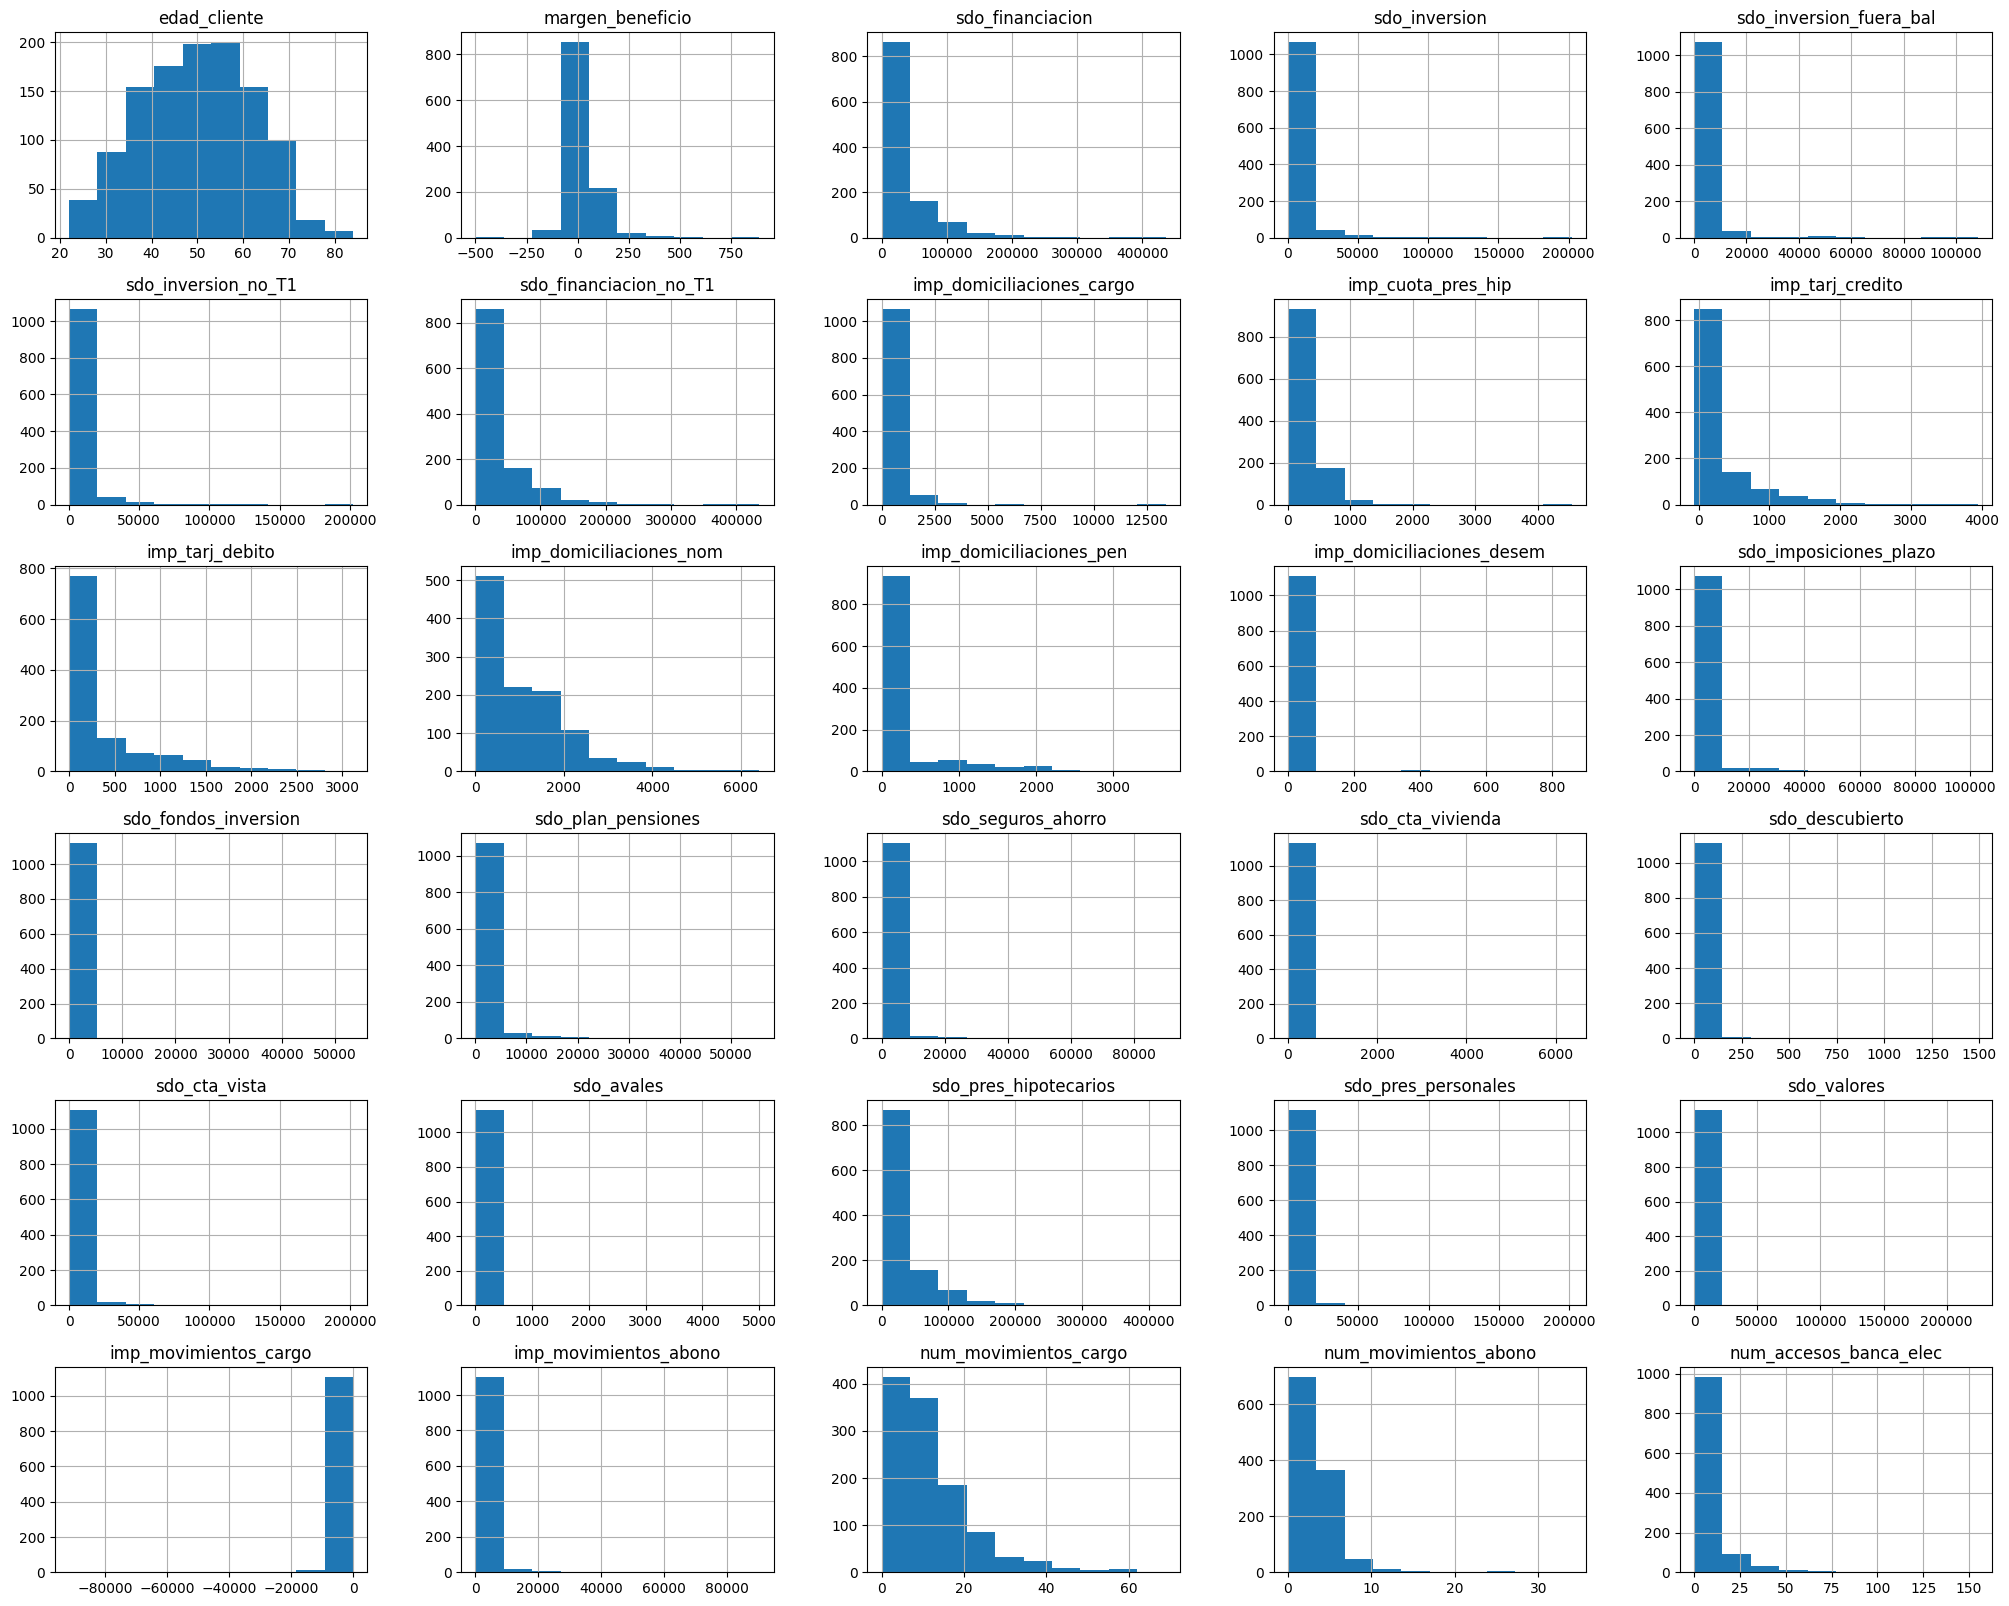

In [46]:
#Visualizacion
df_numeric = train_data.select_dtypes(include=['int64', 'float64'])
df_numeric.hist(figsize=(25, 20))
plt.show()

##Preparacion de datos

In [47]:
#Eliminar nulos
train_data.dropna(inplace=True)

In [48]:
#Cambiar la columna 'cod_cliente' como valores numericos
encoder = LabelEncoder()

#Convertir todos los valores de 'cod_cliente' a cadenas
train_data['cod_cliente'] = train_data['cod_cliente'].astype(str)
application_data['cod_cliente'] = application_data['cod_cliente'].astype(str)

#Concatenar los datos de train y test paraque todas las etiquetas sean codificadas de la misma forma
all_data = pd.concat([train_data['cod_cliente'], application_data['cod_cliente']], axis=0)

#Aplicar el LabelEncoder a 'cod_cliente' de ambos conjuntos
all_data_encoded = encoder.fit_transform(all_data)

#Separar nuevamente los conjuntos
train_data['cod_cliente'] = all_data_encoded[:len(train_data)]
application_data['cod_cliente'] = all_data_encoded[len(train_data):]

In [49]:
#Convertir 'N' y 'S' de Flag a valores numericos
train_data['flag'] = train_data['flag'].map({'N': 0, 'S': 1})

In [50]:
#Verificar que la conversion
print(train_data['flag'].unique())

[1 0]


In [51]:
#Dividir los datos X y Y
X = train_data.drop(columns=['flag'])
y = train_data['flag']

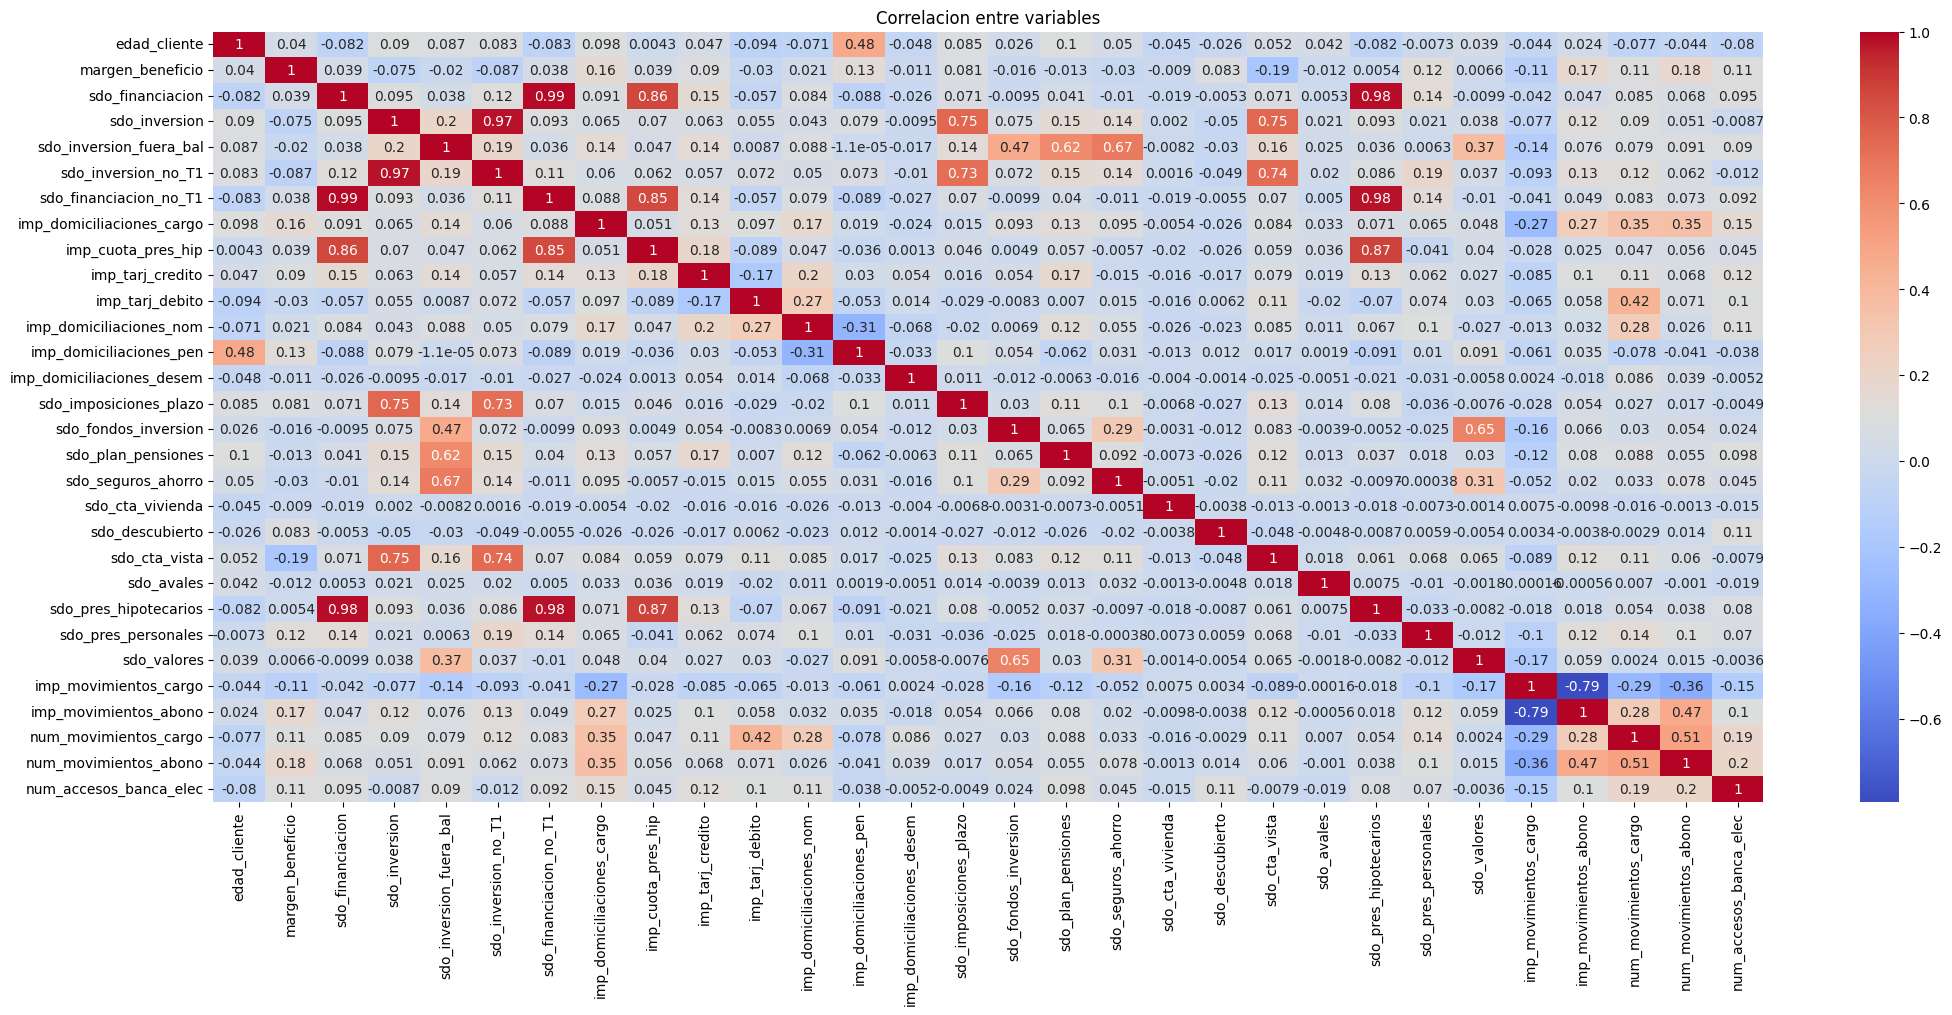

In [52]:
#Visualizacion de la correlacion entre variables
plt.figure(figsize=(25, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlacion entre variables")
plt.show()

In [53]:
#Dividir el conjunto en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Escalado de datos

In [54]:
#Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Modelado de datos

In [55]:
#Modelado
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##Evaluacion del modelo

In [56]:
#Evaluacion del modelo
test_accuracy = accuracy_score(y_test, y_pred)
print("Precision:", test_accuracy)
print("Informe de clasificacion:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Precision: 0.7092511013215859
Informe de clasificacion:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       131
           1       0.63      0.76      0.69        96

    accuracy                           0.71       227
   macro avg       0.71      0.72      0.71       227
weighted avg       0.72      0.71      0.71       227

ROC-AUC Score: 0.7160861959287532


In [57]:
#Resultados
print("""
El modelo tiene una precisión general del 71%, lo que significa que predice correctamente el 71% de los casos.
Para la clase 0 (clientes no interesados en el crédito), tiene una precisión del 79% y un recall del 67%,
mientras que para la clase 1 (clientes interesados en el crédito), la precisión es del 63% y el recall del 76%.
El ROC-AUC es de 0.716, lo que indica que el modelo tiene una capacidad razonable para distinguir entre ambas clases.
""")


El modelo tiene una precisión general del 71%, lo que significa que predice correctamente el 71% de los casos. 
Para la clase 0 (clientes no interesados en el crédito), tiene una precisión del 79% y un recall del 67%, 
mientras que para la clase 1 (clientes interesados en el crédito), la precisión es del 63% y el recall del 76%. 
El ROC-AUC es de 0.716, lo que indica que el modelo tiene una capacidad razonable para distinguir entre ambas clases.



##Aplicacion de nuevos datos

In [58]:
#Aplicacion
application_data = pd.get_dummies(application_data)
application_data = application_data.reindex(columns=X.columns, fill_value=0)
application_scaled = scaler.transform(application_data)
application_pred = model.predict(application_scaled)
application_data['prediction'] = application_pred

In [59]:
#Guardar resultados en un archivo CSV
application_data.to_csv("clientes_susceptibles.csv", index=False)
print("Revisar carpeta de drive con los resultados")

Revisar carpeta de drive con los resultados
